### To make prediction:
  - We will use **graphpattern2vec_process-multithread-PREDICTION-Edited2022** notebook
    - All the cells should be run until **Link Prediction**.
    - Stop using the notebook, and manually run the metapath2vec to generate walk files.
    - Run all the cells after **Link Prediction** until *prediction*
      - Do not use the figures generated in this step for rvaluation purposes.
    - To make prediction run all remaining steps.

In [22]:
from graphpattern2vec import split_data as sp
from graphpattern2vec import biased_walk_multiprocess as BWMP
# from graphpattern2vec import check_walks as CW
from graphpattern2vec import CheckWalks as CW
from graphpattern2vec import link_prediction as LP

## Initialization

In [23]:
data_path = 'data/'
main_edge_file = 'df_edges.csv'
relation_to_predict = 'hasPathway'
train_file = 'df_edges.csv'

node_file = 'df_node.csv'
relation_file = 'df_relation.csv'
type_file = 'df_type.csv'
test_file = ''

result_path = 'results/'

source_types = ['Protein', 'LightKinase', 'DarkKinase']
target_types = ['Pathway']

### Walks

#### Types
- 0,Protein
- 1,Pathway
- 2,LightKinase
- 3,DarkKinase

- 4,PTM
- 5,FunctionalDomain
- 6,BiologicalProcess
- 7,MolecularFunction
- 8,CellularComponent
- 9,Chemical
- 10,Disease

In [24]:
import imp
imp.reload(BWMP)

<module 'graphpattern2vec.biased_walk_multiprocess' from '/hdd/BigIronOnHisHip/r2v/newRegpatterin/RegPattern2Vec_project-main/notebooks/graphpattern2vec/biased_walk_multiprocess.py'>

In [25]:
graph_pattern = [{0:1,2:1,3:1}, {0:1, 2:1, 3:1, 4:1,5:1, 6:1, 7:1, 8:1, 9:1, 10:1}, {0:1,2:1,3:1}, {1:1}]
graph_pattern

[{0: 1, 2: 1, 3: 1},
 {0: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1},
 {0: 1, 2: 1, 3: 1},
 {1: 1}]

In [26]:
# loop_index = [1]
# type_loop = graph_pattern[1]
# num_allow_loop = 3

loop_index = []
type_loop = {}
num_allow_loop = 0
num_processes = 0 # zero for number of cores

biasedwalk = BWMP.BiasedWalk(graph_pattern, loop_index, type_loop, data_path = data_path, 
                            train_file = train_file, postfix='', num_processes = num_processes)

loading data ...
df_train: (6279373, 5)
based on graphpattern df_train_sel: (6279373, 5), set_sel_types: 11


KeyboardInterrupt: 

In [6]:
all_nw = 40
all_wl = 40

walk_file_prefix = 'walk_PREDICTION_REL_simplified_sep_probs'
loop_chance = 0
num_source = 0

initials = {0:'v', 1:'a', 2:'v', 3:'v',4:'f',5:'f', 6:'f', 7:'f', 8:'f', 9:'f', 10:'f'}
walk_file_name = biasedwalk.walk_progress(initials, all_nw = all_nw, all_wl = all_wl, num_source = num_source, 
                                          num_allow_loop = num_allow_loop, walk_file_prefix = walk_file_prefix, 
                                          loop_chance = loop_chance)

NameError: name 'biasedwalk' is not defined

In [7]:
walk_file_name

NameError: name 'walk_file_name' is not defined

### Link Prediction

In [27]:
import imp
imp.reload(LP)

<module 'graphpattern2vec.link_prediction' from '/hdd/BigIronOnHisHip/r2v/newRegpatterin/RegPattern2Vec_project-main/notebooks/graphpattern2vec/link_prediction.py'>

In [28]:
# list_embedding_file = 'emb_walk_final_PREDICTION_10_40_0_0_bwV4_s256_w7_n5_mc5'
# list_embedding_file = 'emb_walk_final_PREDICTION_1for1_10_40_0_0_bwV4_s256_w7_n5_mc5'

# relation simp
list_embedding_file = 'emb_walk_PREDICTION_REL_simplified_sep_probs_40_40_0_0_bwV4_s256_w7_n5_mc5'
list_embedding_file = 'GP2VEC_emb_walk_file_40_40_0_0_bwV4_s256_w7_n5_mc5'

In [29]:
[source_types, target_types]

[['Protein', 'LightKinase', 'DarkKinase'], ['Pathway']]

In [30]:
lp = LP.LinkPrediction(data_path, train_file, node_file, relation_file, type_file
                , list_embedding_file ,test_file, result_path, 
                    [source_types, target_types])

__load_files| df_merge: (6279373, 10), df_nodes: (1064097, 4), df_relations: (13, 2), df_types: (11, 2)

__read_embeddings| row: 1039768, col:256

__read_embeddings| size of emb: 1039767, count line: 1039767, list chk: 1039767

Getting examples
__get_training_examples| list_yes_tuple: 68856, list_yes_emb: 68845 with 11 errors.
__get_training_examples| h_uniq_nodes: 1014602, t_uniq_nodes: 1974
__get_training_examples| list_no_emb: 68688 with 2 rejected, and 155 errors.
__get_training_examples| release some data [set_yes_edges, list_yes_tuple]
__get_training_examples| shuffled.
__get_training_examples| release some data[ __list_no_emb, __list_yes_emb]
__get_training_examples| Garbage Collector.
__get_training_examples| release some data[__list_train_emb] 
__get_training_examples| Training data generated.



In [31]:
#lp.draw_pca_of_all_nodes()

# The validation is for only the link prediction and not for the random walk and does not represent a the overall prefomacne of the whole model
The other notebook named "graphpattern2vec_process-multithread-Edited2022.ipynb" is for the real validation found in the paper

The histagram and Roc cureve in this notebook is not a good represitaion of the the model's prefomance. 

train_model_cross_validation| train_model| 256 and 1
train_model_cross_validation| train_model| X_train: 96273, X_test: 41260, y_train: 96273, y_test:41260
train_model_cross_validation| Cross-validation scores: [0.99740341 0.99563772 0.99532613 0.99605277 0.99594889 0.99522177
 0.99646827 0.99542952 0.99584502 0.99646827]
train_model_cross_validation| Cross-validation Accuracy: 1.00 (+/- 0.00)
Cutt off is calculated to be [0.38878835440223275]
[[20428    81]
 [   83 20668]]
The test set, precision: 0.996096197407104, recall: 0.9960001927617946, f1 score: 0.9960481927710844
__AUC_ROC| roc_auc_lr: 0.9996685740605554


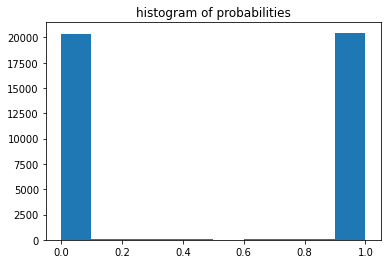

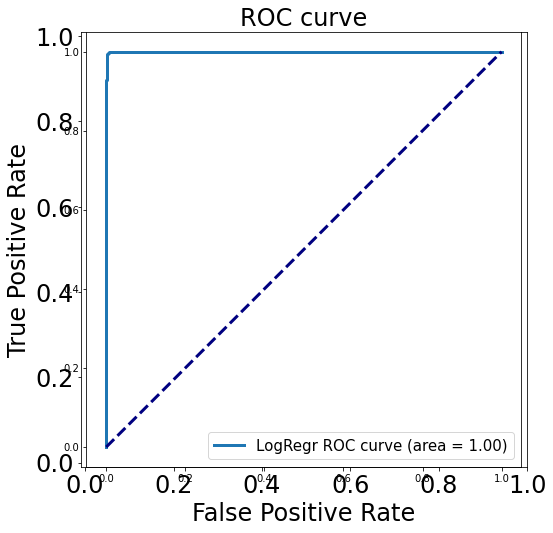

In [32]:
#from graphpattern2vec import link_prediction as LP
ver_name = list_embedding_file[19:] + '.png'
# From GridSearch Best: 0.997333 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
# from GridSearch Best: 0.991940 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
#scoring = ('accuracy', 'f1', 'roc_auc') # accuracy, f1_micro, roc_auc, roc_auc_ovr

lp.train_model_cross_validation_with_split('liblinear', 'ovr', C=1, penalty='l2', cv = 10, ver = ver_name)

# Prediction

In [33]:
dark_kinases = lp.get_node_type_to_id()['DarkKinase']
df_raw_prediction, list_prediction_all ,neg = lp.predict_for_specific_types('DarkKinase', 'Pathway', filter_source=dark_kinases)

  1%|          | 1/151 [00:00<01:21,  1.85it/s]

predict_for_specific_types| source_nodes: 151, target_nodes: 1974


100%|██████████| 151/151 [01:31<00:00,  1.65it/s]


predict_for_specific_types| used cuttoff: [0.38878835440223275]
predict_for_specific_types| missing sources: 0, missing targets: {1929, 5273, 3539, 4484}
predict_for_specific_types| possitive predictions: 60053 (negative predictions: 237417)
predict_for_specific_types| removing the known predictions...
predict_for_specific_types| all prediction: 60053, prediction for unkowns: 59561, remained(known): 492
predict_for_specific_types| Raw Predictions saved.

predict_for_specific_types| all predictions (297470, 5) saved.


In [34]:
df_raw_prediction

,DarkKinase,Pathway,probability,odds,logOdds
0,Q9BUB5,199418,0.9999999993935897,1649048627.6928833,21.223464369290337
1,Q9BUB5,168176,0.9999999990804023,1087431998.848001,20.807084789177104
2,Q6P5Z2,5663220,0.9999999976453935,424699410.9191864,19.86689220823094
3,P31152,5673001,0.9999999971097913,345995769.65313166,19.661937106511218
4,Q9BUB5,5683057,0.9999999961227581,257915299.5859731,19.368141792806504
...,...,...,...,...,...
59556,Q8TD19,8949664,0.3888789847328807,0.6363371165740433,-0.45202679856651534
59557,Q9NRP7,8866652,0.3888707948345155,0.6363151876029475,-0.4520612604081764
59558,Q8TD19,113510,0.3888432941456489,0.6362415570685348,-0.45217698103879367
59559,O43781,6811434,0.38883354126627917,0.6362154462335933,-0.4522180210658868


In [35]:
# df_node = pd.read_csv(data_path + node_file)
# node_id_to_name = dict(zip(df_node.id, df_node.name))
# len(node_id_to_name)

In [36]:
# [ node_id_to_name[path] for path in {6854, 8272, 3664, 4791, 3768, 4217, 3547, 8830, 2271}]

#### Uniprot to Gene Name

In [37]:
import pandas as pd
df_uniprot_mapping= pd.read_csv(data_path + 'original/GeneNameMapping.txt', sep='\t', names=['uniprot', 'mapping', 'GeneName'])
print('df_uniprot_mapping: {}'.format(df_uniprot_mapping.shape))

uniprot_to_gene = dict(zip(df_uniprot_mapping.uniprot, df_uniprot_mapping.GeneName))
len(uniprot_to_gene), uniprot_to_gene['Q8N5S9']

df_uniprot_mapping: (44616058, 3)


(44614225, 'CAMKK1')

In [38]:
df_reactome = pd.read_csv(data_path + 'original/' + 'UniProt2Reactome_All_Levels.txt'
                          , sep='\t', names=['uniprot', 'pathway_id', 'url', 'pathway_name', 'abr', 'd'])
# df_reac_human = df_reactome[]
df_reac_human = df_reactome[df_reactome['pathway_id'].str.contains('R-HSA')]

In [39]:
# list_pathway_ids = list(df_reactome['pathway_id'].unique())

pathway_id_to_name = dict()

pathway_code_to_id = dict()

for i in df_reactome.itertuples():
    pa_id = i[2]
    pa_name = i[4]
    if pa_id in pathway_id_to_name and pa_name != pathway_id_to_name[pa_id]:
        print('err')
    pathway_id_to_name[pa_id] = pa_name
    
    pa_code = pa_id[pa_id.rindex('-') + 1:]
    if pa_code not in pathway_code_to_id:
        pathway_code_to_id[pa_code] = list()
    pathway_code_to_id[pa_code].append(pa_id)
    
len(pathway_id_to_name), len(pathway_code_to_id)

(20969, 2649)

In [40]:
import pandas as pd
node_map_file = ''
final_prediction_names = ['uniprot', 'ProteinName', 'Pathway_id', 'Pathway_Name', 'Score']
prediction_file_path = data_path + result_path

In [41]:
list_prediction_name = list()
errs = []
for i in df_raw_prediction.itertuples():

    s_name = uniprot_to_gene[i[1]]
    path_code = i[2]
    try:
        list_pa_ids = pathway_code_to_id[path_code]
    except KeyError as e:
        errs.append(path_code)
        continue
        sd
        
    if len(list_pa_ids) == 1:
        t_name = pathway_id_to_name[list_pa_ids[0]]
    else:
        hum = [i for i in list_pa_ids if 'R-HSA' in i]
        if len(hum) > 0 :
            t_name = pathway_id_to_name[hum[0]]
        else:
            t_name = pathway_id_to_name[list_pa_ids[0]]

    list_prediction_name.append([i[1], s_name, i[2], t_name, i[3]])

    
df_prediction_name = pd.DataFrame(list_prediction_name, columns=final_prediction_names)
df_prediction_name.head(10)

,uniprot,ProteinName,Pathway_id,Pathway_Name,Score
0,Q9BUB5,MKNK1,199418,Negative regulation of the PI3K/AKT network,0.9999999993935897
1,Q9BUB5,MKNK1,168176,Toll Like Receptor 5 (TLR5) Cascade,0.9999999990804023
2,Q6P5Z2,PKN3,5663220,RHO GTPases Activate Formins,0.9999999976453935
3,P31152,MAPK4,5673001,RAF/MAP kinase cascade,0.9999999971097913
4,Q9BUB5,MKNK1,5683057,MAPK family signaling cascades,0.9999999961227581
5,P78368,CSNK1G2,176974,Unwinding of DNA,0.9999999936017137
6,O75747,PIK3C2G,1483249,Inositol phosphate metabolism,0.9999999928222838
7,Q99640,PKMYT1,69231,Cyclin D associated events in G1,0.9999999922670001
8,Q13188,STK3,390471,Association of TriC/CCT with target proteins d...,0.9999999922031578
9,Q9HC98,NEK6,2555396,Mitotic Metaphase and Anaphase,0.9999999896012494


In [42]:
df_prediction_name[df_prediction_name.ProteinName == 'STK40'].shape

(1441, 5)

In [43]:
len(errs), len(set(errs)) # pathway_code_to_id errors

(0, 0)

In [44]:
prediction_file_path + 'df_prediction_name_{}.csv'.format(list_embedding_file)

'data/results/df_prediction_name_GP2VEC_emb_walk_file_40_40_0_0_bwV4_s256_w7_n5_mc5.csv'

In [45]:
df_prediction_name.to_csv(prediction_file_path + 'df_prediction_name_{}.csv'.format(list_embedding_file), index = False)